In [6]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("../week13repo/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [8]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth =15,random_state=100)

In [9]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82 18]
 [28 26]]


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



In [12]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

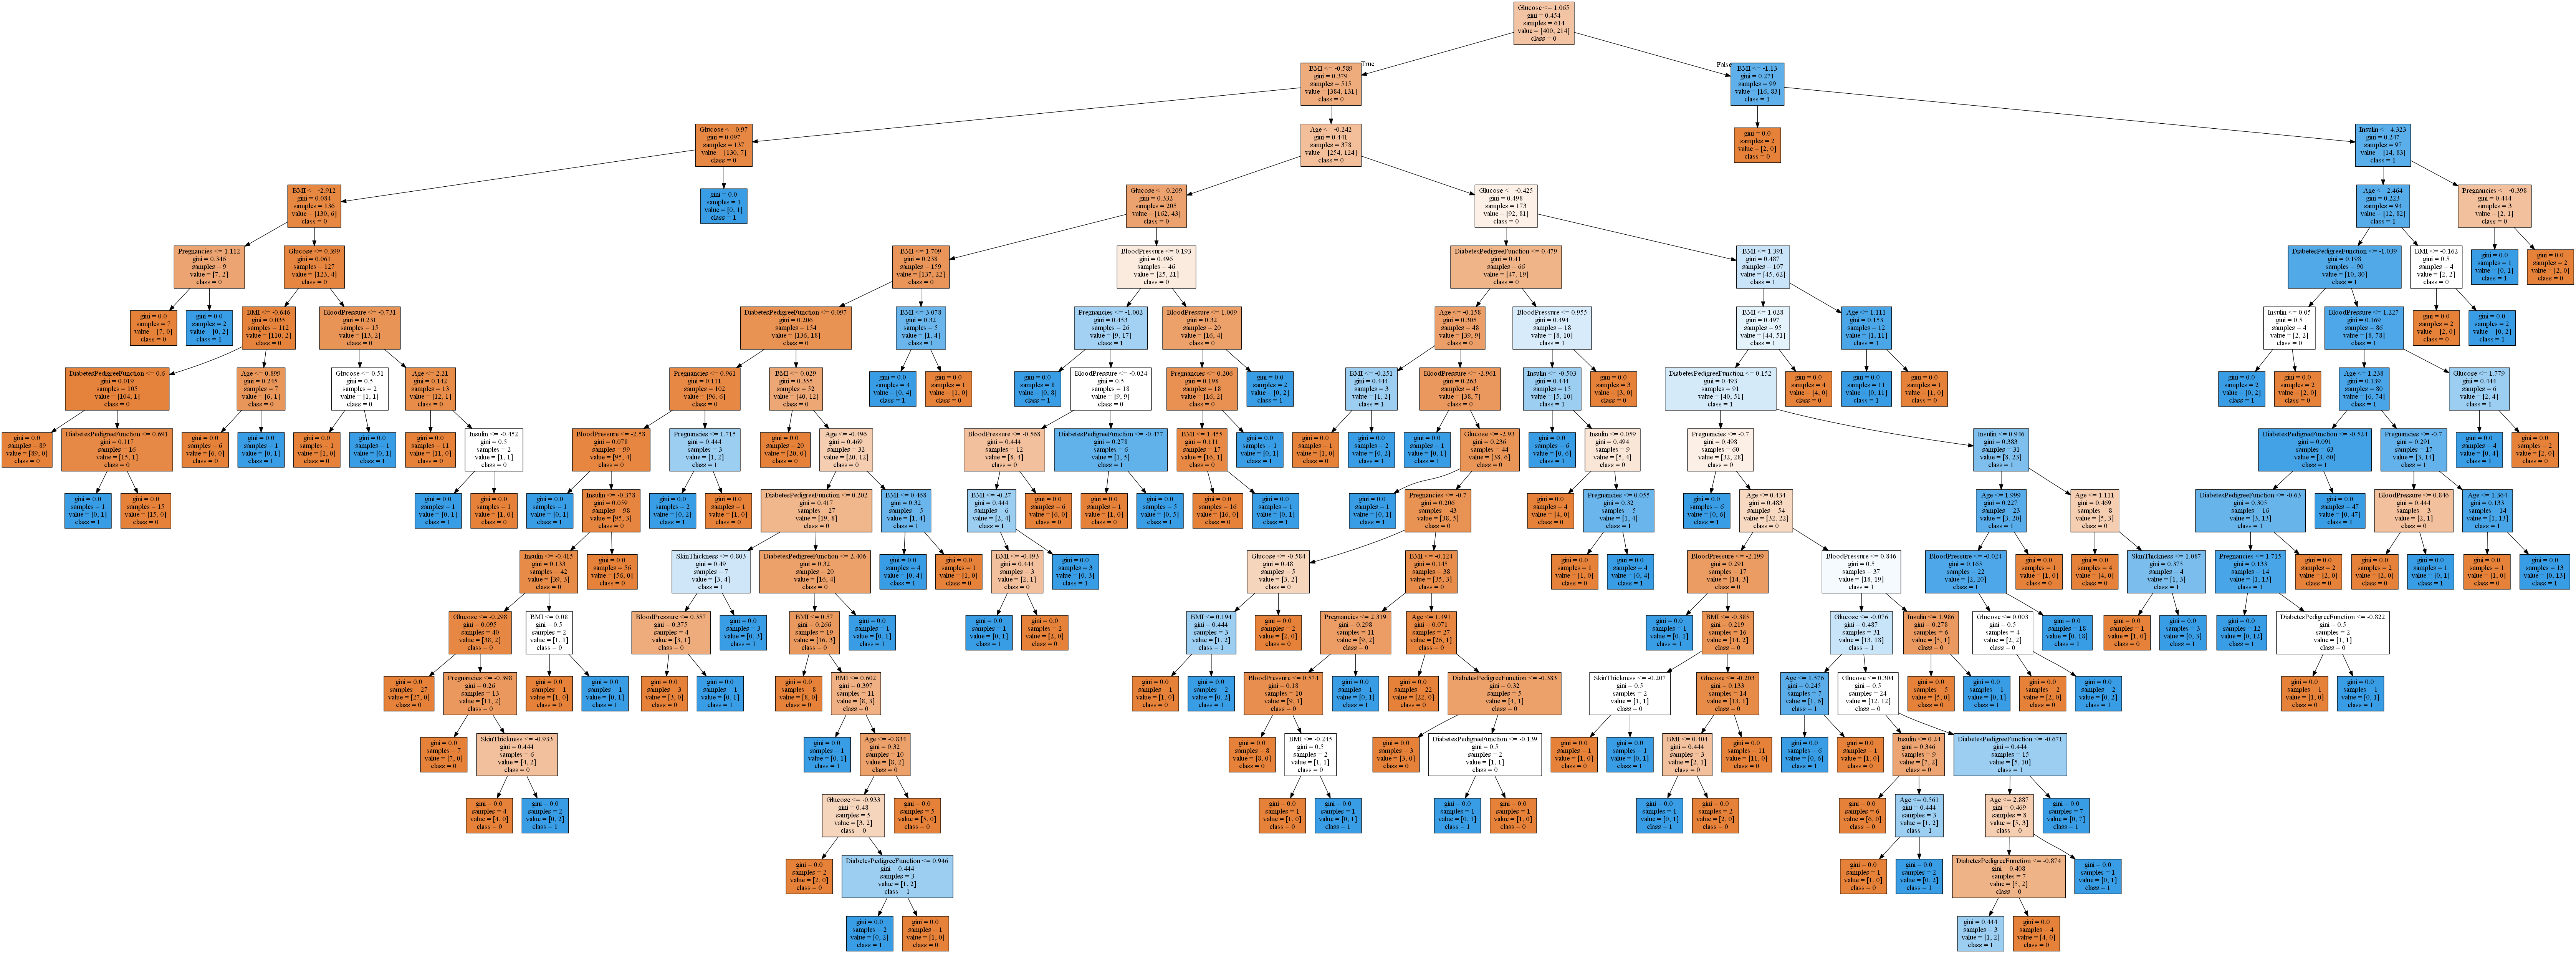

In [13]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)

#### Example input: [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ] 


#### Example output: Nichole, Tanisha & Maggie

In [1]:
def namelist(names):
    str = ''
    if len(names) != 0:
      arr = []
      for i in range(0, len(names) - 1):
          arr.append(names[i]['name'])
      str = ', '.join(arr)
      str += ' & ' + names[-1]['name'] if str != '' else names[-1]['name']
     
    return str

In [2]:
namelist([ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ])

'Nichole, Tanisha & Maggie'

In [3]:
namelist([ {'name': 'Nichole'}, {'name': 'Tanisha'} ])

'Nichole & Tanisha'

In [4]:
namelist([ {'name': 'Nichole'} ])

'Nichole'